Credits (Udemy Course) - https://www.udemy.com/course/complete-tensorflow-2-and-keras-deep-learning-bootcamp/

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image = X_train[0]

In [5]:
single_image.shape

(28, 28)

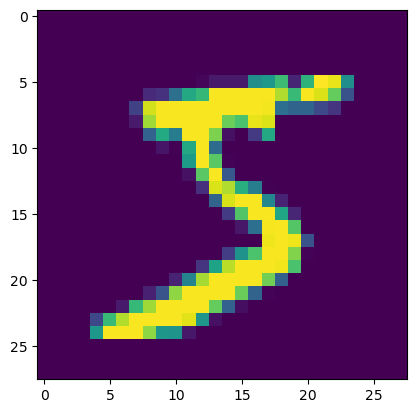

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [9]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [10]:
single_image.min(), single_image.max()

(0, 255)

In [11]:
# because the images we will get for this mnist dataset is always from 0 to 255, we can scale it like this:

X_train = X_train/255
X_test = X_test/255

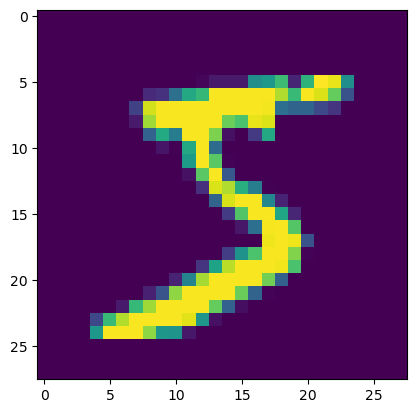

In [12]:
scaled_img = X_train[0]
plt.imshow(scaled_img)

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
# need to add one more dim to let the model know about RGB channel

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [15]:
model = Sequential()

model.add(Conv2D( filters = 32,
                  kernel_size = (4,4),
                  strides=(1, 1),
                  padding='valid',
                  input_shape = (28,28,1),
                  activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Output, softmax since multiclass classification
model.add(Dense(10, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])

In [16]:
earlystop = EarlyStopping(monitor='val_loss', patience=5)

In [17]:
model.fit(X_train, y_cat_train, epochs=50, validation_data=(X_test, y_cat_test), callbacks=[earlystop])

Epoch 1/50
1875/1875 [==============================] - 68s 35ms/step - loss: 0.1324 - accuracy: 0.9604 - val_loss: 0.0588 - val_accuracy: 0.9813
Epoch 2/50
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 0.0343 - val_accuracy: 0.9891
Epoch 5/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 6/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0468 - val_accuracy: 0.9861
Epoch 7/50
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0518 - val_accuracy: 0.9874
Epoch 8/50
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0467 - val_accuracy: 0.9880
Epoch 9/50
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0491 

In [19]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.132368,0.960400,0.058841,0.9813
1,0.046296,0.986000,0.038874,0.9868
2,0.029763,0.990267,0.043490,0.9852
3,0.019345,0.993950,0.034278,0.9891
4,0.014495,0.995317,0.036082,0.9892


<AxesSubplot:>

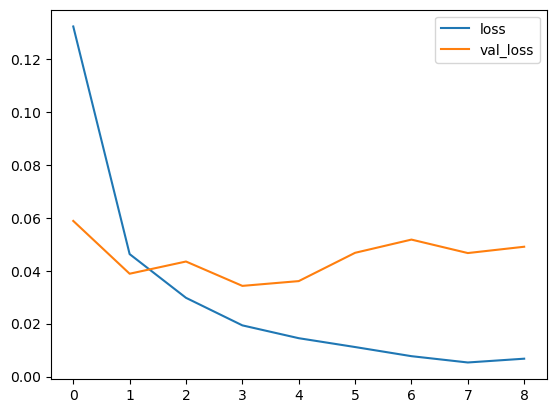

In [20]:
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

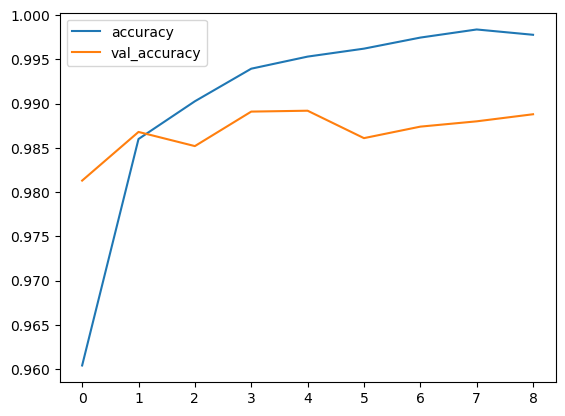

In [21]:
losses[['accuracy', 'val_accuracy']].plot()

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0491 - accuracy: 0.9888


[0.049076832830905914, 0.9887999892234802]

In [29]:
predictions = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 4s 11ms/step


In [30]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [36]:
cf = confusion_matrix(y_test, predictions)
print(cf)

[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1133    0    0    0    0    1    1    0    0]
 [   3    3 1015    1    0    0    3    5    2    0]
 [   0    0    0 1003    0    3    0    3    1    0]
 [   0    0    2    0  966    0    2    0    1   11]
 [   1    0    0    4    0  883    4    0    0    0]
 [   4    3    0    0    1    2  946    0    2    0]
 [   1    1    6    1    0    0    0 1012    2    5]
 [   4    1    1    1    0    0    3    0  962    2]
 [   4    1    0    0    6    6    0    2    2  988]]


<AxesSubplot:>

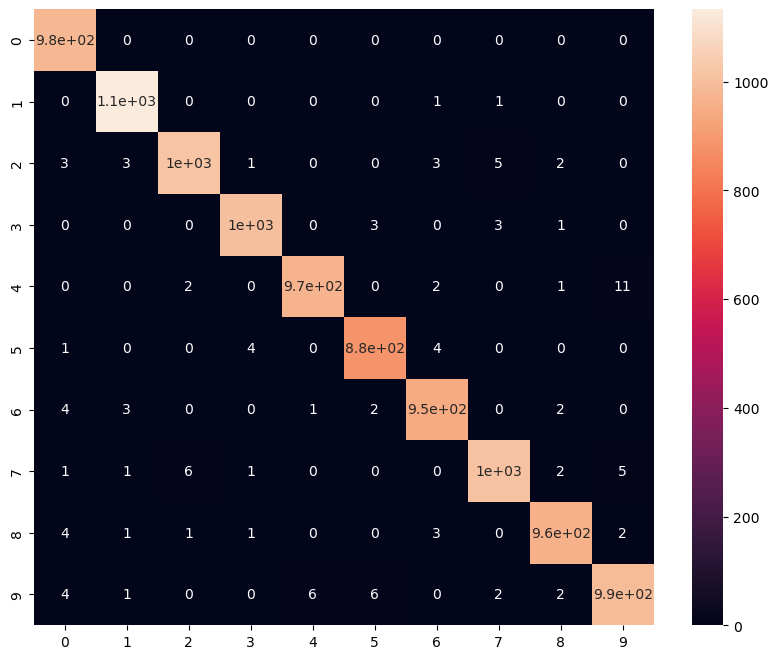

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(cf, annot=True)